In [1]:
import os
import time
from astropy.io import fits
from concurrent.futures import ThreadPoolExecutor, as_completed

base_dir = "/lustre/hawcz01/scratch/userspace/jorgeamontes/GRB_KN/data/recalculated"
output_base_dir = "/lustre/hawcz01/scratch/userspace/jorgeamontes/GRB_KN/data/corrected"
os.makedirs(output_base_dir, exist_ok=True)

def process_fits(input_file_path):
    try:
        relative_path = os.path.relpath(os.path.dirname(input_file_path), base_dir)
        output_dir = os.path.join(output_base_dir, relative_path)
        os.makedirs(output_dir, exist_ok=True)

        file_name = os.path.basename(input_file_path)
        output_file_path = os.path.join(output_dir, file_name.replace("recalculated_transit", "corrected_transit"))

        if os.path.exists(output_file_path):
            return ("skip", input_file_path)

        with fits.open(input_file_path) as hdulist:
            hdulist[0].header['EPOCH'] = 'current'
            hdulist.writeto(output_file_path, overwrite=True)
        return ("ok", input_file_path)

    except Exception as e:
        return ("error", input_file_path, str(e))

def find_fits_files():
    for root, _, files in os.walk(base_dir):
        for file_name in files:
            if file_name.endswith(".fits.gz") and "recalculated_transit" in file_name:
                yield os.path.join(root, file_name)

# def main():
#     start_time = time.time()
#     fits_files = list(find_fits_files())
#     print(f"🔍 Found {len(fits_files)} files to process.\n")

#     results = {"ok": [], "skip": [], "error": []}

#     with ThreadPoolExecutor(max_workers=8) as executor:
#         futures = [executor.submit(process_fits, f) for f in fits_files]
#         for future in as_completed(futures):
#             result = future.result()
#             status = result[0]
#             results[status].append(result)

#             if status == "ok":
#                 print(f"✅ {result[1]}")
#             elif status == "skip":
#                 print(f"⏭️  Skipped (already exists): {result[1]}")
#             elif status == "error":
#                 print(f"❌ Error in {result[1]}: {result[2]}")

#     print("\n📊 RESUMEN:")
#     print(f"✔️ Procesados correctamente: {len(results['ok'])}")
#     print(f"⏭️  Omitidos (ya existían): {len(results['skip'])}")
#     print(f"❌ Errores: {len(results['error'])}")
#     print(f"⏱️ Tiempo total: {time.time() - start_time:.2f} segundos")

# if __name__ == "__main__":
#     main()


Opened /lustre/hawcz01/scratch/userspace/jorgeamontes/GRB_KN/data/corrected/GRB160612842/transit_2/GRB160612842_corrected_transit_2_binB10C1_N1024.fits.gz
Filename: /lustre/hawcz01/scratch/userspace/jorgeamontes/GRB_KN/data/corrected/GRB160612842/transit_2/GRB160612842_corrected_transit_2_binB10C1_N1024.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  xtension      1 BinTableHDU     24   12288R x 3C   [1024D, 1024D, 1024D]   

HDU 0:

HDU 1:
  Data shape: (12288,)
  Columns: ColDefs(
    name = 'data map'; format = '1024D'; unit = 'unknown'
    name = 'background map'; format = '1024D'; unit = 'unknown'
    name = 'exposure'; format = '1024D'; unit = 'unknown'
)


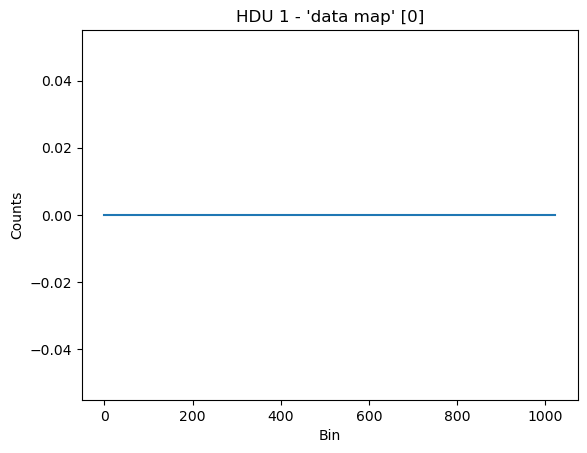

Opened /lustre/hawcz01/scratch/userspace/jorgeamontes/GRB_KN/data/corrected/GRB160612842/transit_2/GRB160612842_corrected_transit_2_binB10C0_N1024.fits.gz
Filename: /lustre/hawcz01/scratch/userspace/jorgeamontes/GRB_KN/data/corrected/GRB160612842/transit_2/GRB160612842_corrected_transit_2_binB10C0_N1024.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  xtension      1 BinTableHDU     24   12288R x 3C   [1024D, 1024D, 1024D]   

HDU 0:

HDU 1:
  Data shape: (12288,)
  Columns: ColDefs(
    name = 'data map'; format = '1024D'; unit = 'unknown'
    name = 'background map'; format = '1024D'; unit = 'unknown'
    name = 'exposure'; format = '1024D'; unit = 'unknown'
)


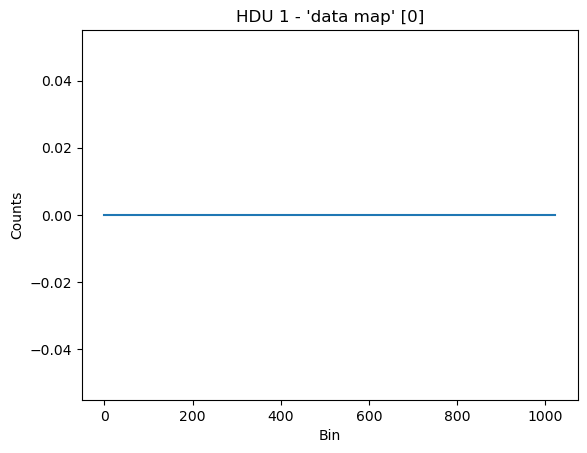